In [ ]:
!pip install scanpy
!pip install celloracle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.0
    Uninstalling numpy-1.25.0:
      Successfully uninstalled numpy-1.25.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import networkx as nx

In [ ]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_data = '/content/drive/Othercomputers/Мое устройство Ноутбук/Desktop/sinovac_clear.h5ad'

In [ ]:
adata = sc.read_h5ad(path_data)

Размерность числе сэмплов на число генов.

In [ ]:
adata.X.shape

(166989, 3000)

Нормализуем и логарифмируем

In [ ]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

1.

##### a) Визуализация в пространстве UMAP клеточных кластеров.

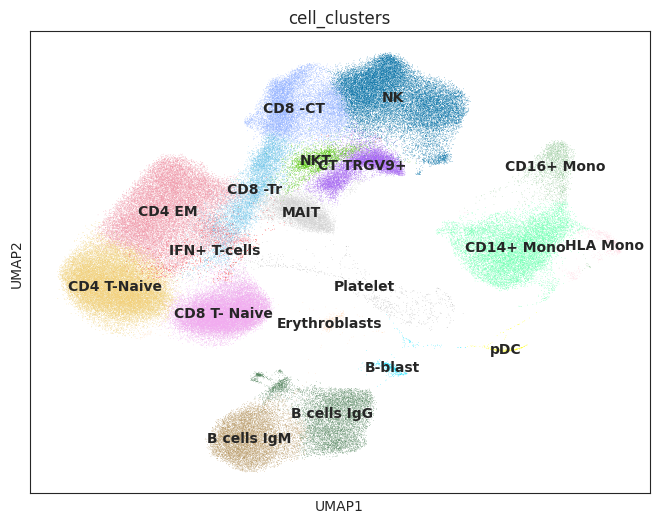

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sc.pl.umap(adata, color='cell_clusters', legend_loc='on data', ax=ax)
plt.show()

В датасете 19 клеточных кластеров

In [ ]:
adata.obs['cell_clusters'].unique()

['pDC', 'B-blast', 'CD14+ Mono', 'CD4 T-Naive', 'IFN+ T-cells', ..., 'NKT', 'CD16+ Mono', 'Platelet', 'Erythroblasts', 'HLA Mono']
Length: 19
Categories (19, object): ['B cells IgG', 'B cells IgM', 'B-blast', 'CD4 EM', ..., 'NK', 'NKT', 'Platelet',
                          'pDC']

In [ ]:
adata.obs

,orig.ident,Origin,Group,point,patient,cell_clusters,doublet_score,nCount_RNA,nFeature_RNA,percent.mt
NJ-4-5-LIB_ACGGGCTTCAGTACGT-1,NJ-4-5-LIB,Wang,Sino-,NJ,4,pDC,0.130239,7410.0,7410.0,7410.0
NJ-4-5-LIB_AGCTTGATCAAGCCTA-1,NJ-4-5-LIB,Wang,Sino-,NJ,4,B-blast,0.116539,1832.0,1832.0,1832.0
NJ-4-5-LIB_AGGCCGTCAGGCTCAC-1,NJ-4-5-LIB,Wang,Sino-,NJ,4,B-blast,0.113479,15384.0,15384.0,15384.0
NJ-4-5-LIB_CAGCATAAGTGAAGTT-1,NJ-4-5-LIB,Wang,Sino-,NJ,4,pDC,0.055204,8188.0,8188.0,8188.0
NJ-4-5-LIB_CGGACGTAGTCGTTTG-1,NJ-4-5-LIB,Wang,Sino-,NJ,4,B-blast,0.101183,21402.0,21402.0,21402.0
...,...,...,...,...,...,...,...,...,...,...
SJ-5-5-LIB_TTTGTCAGTGACAAAT-1,SJ-5-5-LIB,Wang,Sino++,SJ,5,NKT,0.198981,4382.0,4382.0,4382.0
SJ-5-5-LIB_TTTGTCATCAACTCTT-1,SJ-5-5-LIB,Wang,Sino++,SJ,5,NK,0.003364,3063.0,3063.0,3063.0
SJ-5-5-LIB_TTTGTCATCCTTGACC-1,SJ-5-5-LIB,Wang,Sino++,SJ,5,NKT,0.161765,6224.0,6224.0,6224.0
SJ-5-5-LIB_TTTGTCATCGAATGGG-1,SJ-5-5-LIB,Wang,Sino++,SJ,5,NK,0.010661,3250.0,3250.0,3250.0


Имена 3000 уникальных генов

In [ ]:
names_genes = adata.var.index.values

Иерархическая связь между клеточными типами

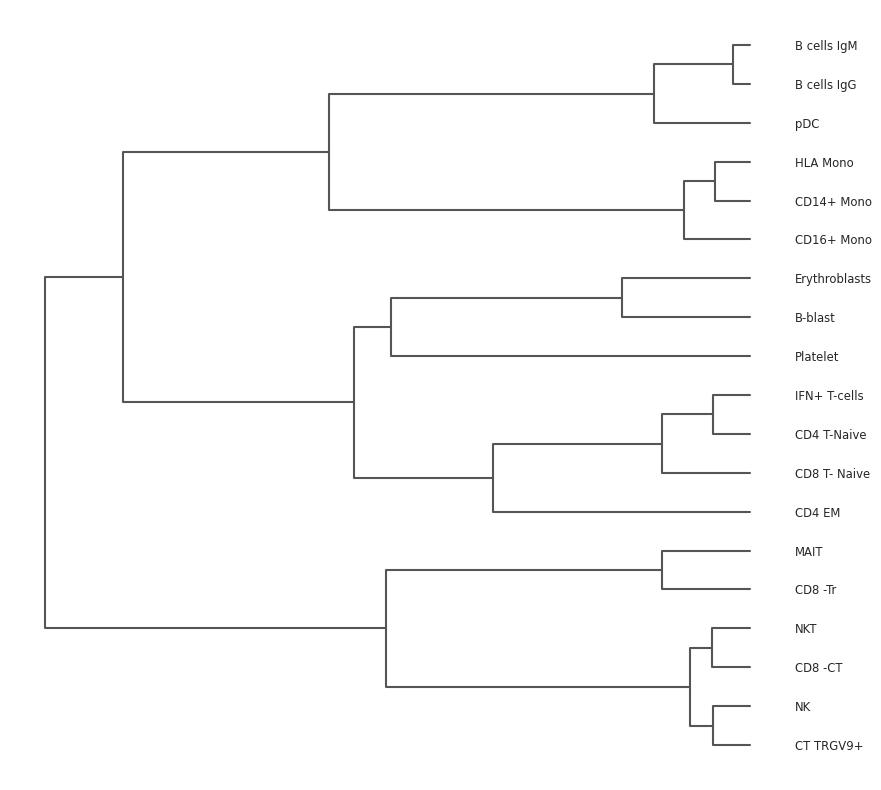

In [ ]:
sc.tl.dendrogram(adata, groupby='cell_clusters', n_pcs=15, use_rep='X_pca')
sc.pl.dendrogram(adata, groupby='cell_clusters', orientation='left');


Вычисление интенсивности дифференциальной экспрессии генов каждого клеточного типа.



In [ ]:
sc.tl.rank_genes_groups(adata, groupby='cell_clusters')

In [ ]:
adata.uns['rank_genes_groups'].keys()

dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])

Проиндексируем каждый клеточный кластер

In [ ]:
index_genes = {i: adata.uns['rank_genes_groups']['names'][i] for i in range(len(adata.uns['rank_genes_groups']['names']))}

In [ ]:
data_expr = pd.DataFrame(adata.uns['rank_genes_groups']['scores']).T

In [ ]:
marker_genes = 10

In [ ]:
subset = data_expr.iloc[:, :marker_genes]

In [ ]:
subset

,0,1,2,3,4,5,6,7,8,9
B cells IgG,543.648560,510.768768,424.777435,357.872345,357.433350,320.030518,269.017914,259.575623,250.593536,230.689270
B cells IgM,693.831604,553.932068,510.932800,476.748230,391.498413,342.166168,274.421204,272.990295,251.603195,235.926239
B-blast,64.571259,62.323261,54.495930,54.182629,54.111774,44.674263,42.909599,38.087448,36.973049,36.815117
CD4 EM,170.856949,144.119705,134.527557,125.170982,123.411743,121.560493,118.093559,116.077682,116.021515,112.281258
CD4 T-Naive,388.030945,345.666962,291.645813,289.505768,267.573883,249.261703,240.981934,195.719925,187.663666,152.983429
CD8 -CT,528.382324,427.592468,377.059814,311.475983,240.189072,207.806870,189.287094,166.069595,144.741150,141.716843
CD8 -Tr,106.485390,102.043678,93.247742,82.254768,77.993797,71.214935,64.300522,61.652828,60.268616,54.512585
CD8 T- Naive,495.589508,285.851593,267.936859,254.230438,229.409515,218.005798,215.013092,196.851822,195.838699,190.531693
CD14+ Mono,789.247070,787.245239,608.393250,599.397461,563.399231,498.637054,476.475555,376.086426,352.936981,352.268799
CD16+ Mono,387.466827,369.323822,337.298401,310.707977,306.675812,295.180969,292.823853,244.664856,237.466904,227.005829


Визуализация маркерных генов на тепловой карте.

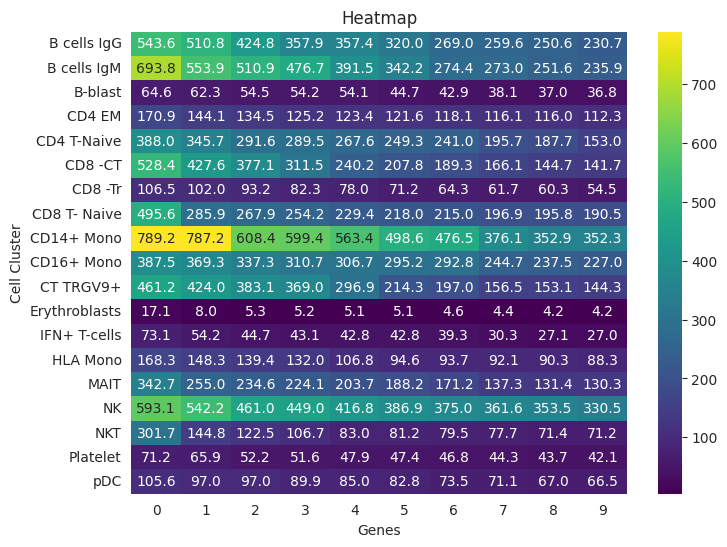

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(subset, cmap='viridis', annot=True, fmt='.1f', ax=ax)
plt.title('Heatmap')
plt.xlabel('Genes')
plt.ylabel('Cell Cluster')
plt.show()

#### 2. Выделим топ экспрессируемых генов в IFN+ T клетках

In [ ]:
def topde_genes(cell_group='IFN+ T-cells', n=1):
    idx_genes = data_expr.loc[cell_group, :][:n].index.values
    genes_groups = [index_genes[index] for index in index_genes if index in idx_genes]

    ifn_T_genes = set()
    for group in genes_groups:
        ifn_T_genes.update(set(group))
    return ifn_T_genes


In [ ]:
ifn_T_genes = topde_genes()

In [ ]:
ifn_T_genes

{'CD74',
 'CD8B',
 'GZMK',
 'HLA-DRA',
 'IFITM1',
 'IL7R',
 'JCHAIN',
 'KLRB1',
 'LST1',
 'LYZ',
 'MALAT1',
 'NKG7',
 'PPBP',
 'TPT1'}

IFN+ T-клетки - это T клетки продуцирующие интерферон, участвующий во противовирусном и противобактериальном иммунном ответ.
интерферон в основном продуцируется Т-клетками, особенно CD4+ хелперными Т-клетками и CD8+ цитотоксическими Т-клетками, а также естественными киллерами (NK).

Интерферон заметно увеличивает опосредованный Т-клетками иммунитет за счет усиления экспрессии MHC-I в клетках-мишенях и может напрямую способствовать дифференцировке и гибели клеток-мишеней.

IFN+ Т-клетки имеют решающее значение для координации иммунного ответа путем активации других иммунных клеток, таких как макрофаги и дендритные клетки, для повышения их способности уничтожать патогены.

Bhat, P., Leggatt, G., Waterhouse, N. et al. Interferon-γ derived from cytotoxic lymphocytes directly enhances their motility and cytotoxicity. Cell Death Dis 8, e2836 (2017). https://doi.org/10.1038/cddis.2017.67




Функции характерных генов:

  a) IFITM1 - мембранный белок из семейства интерферон индуцируемых мембранных белков.

  б) NKG7 - мембранный белок, Регулирует экзоцитоз цитотоксических гранул в эффекторных лимфоцитах Необходим для цитотоксической дегрануляции естественных киллеров (NK) и Т-клеток CD8, а также для активации Т-клеток CD4 после инфекции.

  в) GrK - сериновая протеаза, обнаружена в гранулах  NK клеток и CD8 Т-клеток. Вырабатываются против чужеродных, инфицированных или раковых клеток.



Так как интерфероны выполняет противовирусную функцию, логично было увидеть  обогащение их генов в T-клетках.

Более того, авторы сравнивали уровень экспрессии IFN-α у пациентов, болеющих SARS-Cov2 и принимающих вакцину CoronoVac и обнаружили увеличение экспрессии у первой категории. Повышенный выброс интерферона приводит к иммуннопатологии и разрушению клеток.

#### 3. Построение GRN

In [ ]:
import celloracle as co

In [ ]:
# Проверим данные в аннотации
print("Metadata columns :", list(adata.obs.columns))
print("Dimensional reduction: ", list(adata.obsm.keys()))

Metadata columns : ['orig.ident', 'Origin', 'Group', 'point', 'patient', 'cell_clusters', 'doublet_score', 'nCount_RNA', 'nFeature_RNA', 'percent.mt']
Dimensional reduction:  ['X_pca', 'X_pca_harmony', 'X_umap']


Downsampling

In [ ]:
def downsample(n=20000):
    if adata.shape[0] > n:
        sc.pp.subsample(adata, n_obs=n, random_state=123)

In [ ]:
downsample()

In [ ]:
base_GRN = co.data.load_human_promoter_base_GRN()



Loading prebuilt promoter base-GRN. Version: hg19_gimmemotifsv5_fpr2
Data not found in the local folder. Loading data from github. Data will be saved at /root/celloracle_data/promoter_base_GRN


  0%|          | 0.00/5.26M [00:00<?, ?B/s]

In [ ]:
oracle = co.Oracle()

In [ ]:
oracle.import_anndata_as_raw_count(adata=adata,
                                   cluster_column_name='cell_clusters',
                                   embedding_name='X_umap')

In [ ]:
oracle.import_TF_data(TF_info_matrix=base_GRN)

Построим график зависимости: количество главных компонент и объясненная дисперсия.

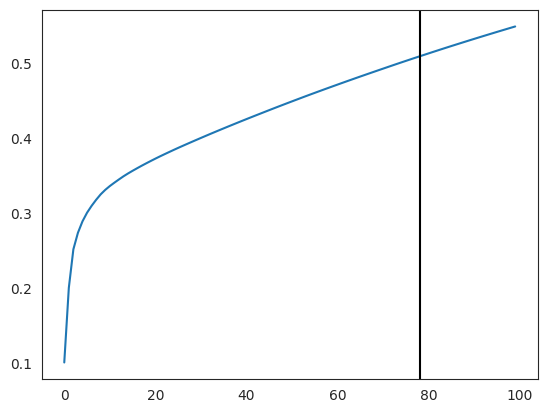

78


In [ ]:

oracle.perform_PCA()

# Select important PCs
plt.plot(np.cumsum(oracle.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
plt.show()
print(n_comps)
n_comps = min(n_comps, 50)

78 компонент покрывают примерно 0.48 дисперсии.

In [ ]:
n_cell = oracle.adata.shape[0]
print(f"cell number is :{n_cell}")

cell number is :20000


In [ ]:
k = int(0.025*n_cell)
print(f"Auto-selected k is :{k}")

Auto-selected k is :500


In [ ]:
oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

In [ ]:
links = oracle.get_links(cluster_name_for_GRN_unit='cell_clusters', alpha=10,
                         verbose_level=10)

  0%|          | 0/19 [00:00<?, ?it/s]

Inferring GRN for B cells IgG...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for B cells IgM...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for B-blast...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD14+ Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD16+ Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD4 EM...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD4 T-Naive...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 -CT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 -Tr...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 T- Naive...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CT TRGV9+...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for Erythroblasts...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for HLA Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for IFN+ T-cells...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for MAIT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for NK...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for NKT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for Platelet...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for pDC...


  0%|          | 0/2026 [00:00<?, ?it/s]

In [ ]:
with open("links.pkl", "wb") as file:
    pickle.dump(links, file)

In [ ]:
def load_pkl(path):
    with open(path, 'rb') as file:
        links = pickle.load(file)
    return links

In [ ]:
pickle_file_path = '/content/drive/Othercomputers/Мое устройство Ноутбук/Desktop/links.pkl'

In [ ]:
links = load_pkl(pickle_file_path)

In [ ]:
def gettop_net(links, group='CD8 -CT'):
    links.filter_links(p=0.001, weight='coef_abs', threshold_number=2000)
    net = links.filtered_links[group]
    net_sorted = net.sort_values(by='p').head(n=100)
    return net_sorted


#### 4. Визуализация топ 100 взаимодействий.

In [ ]:
net_sorted = gettop_net(links)


In [ ]:
def plot_net(net_sorted):
    to_net = nx.from_pandas_edgelist(net_sorted, 'source', 'target', create_using=nx.DiGraph())
    plt.rcParams["figure.figsize"] = [10, 10]
    nx.draw(to_net, with_labels=True, node_color='lightblue', node_size=800, font_size=6)
    plt.show()

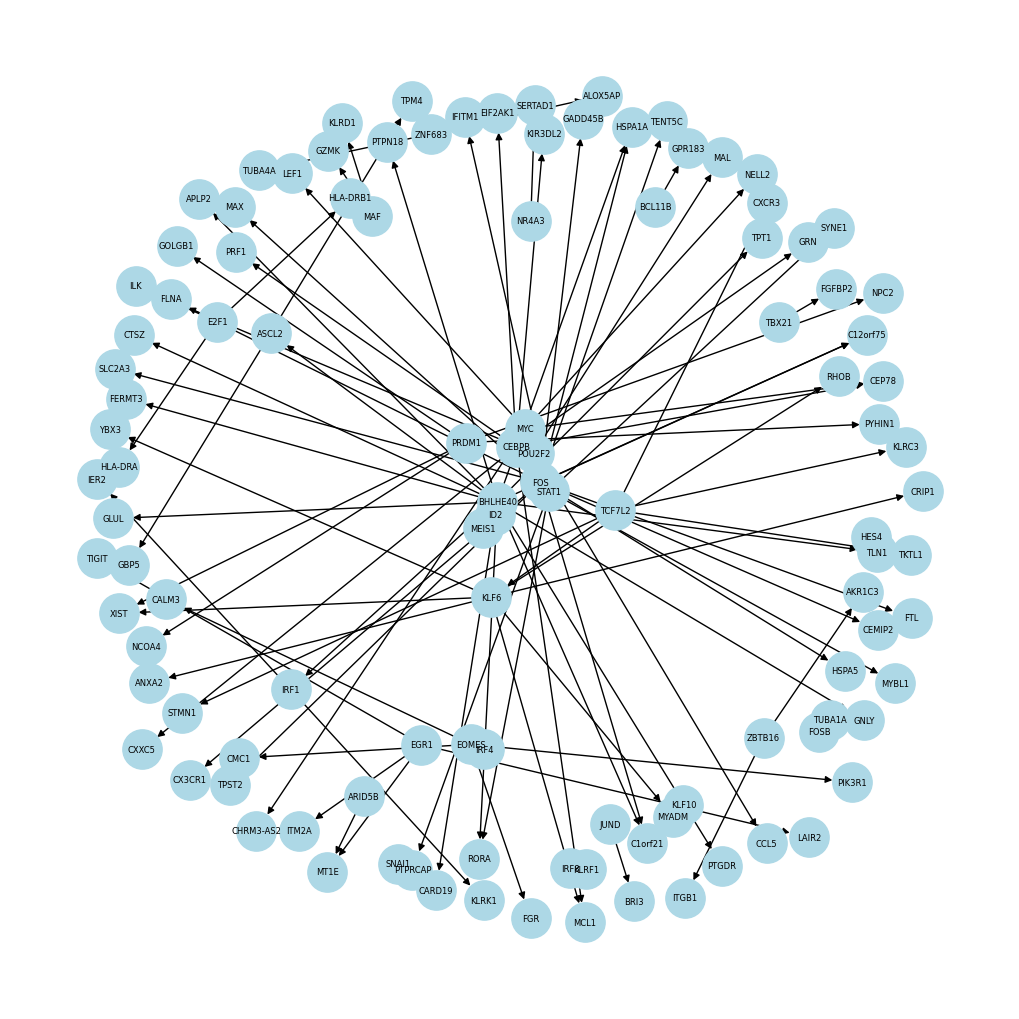

In [ ]:
plot_net(net_sorted)

Выделим топ-10 генов, имеющих больше всех выходящих связей

In [ ]:
def gettop_tf(links, group='CD8 -CT', n=10):
    links.get_network_score()
    scores = links.merged_score
    group_genes = scores[scores['cluster']==group]
    tr_factors = group_genes.sort_values(by='degree_out', ascending=False).head(n=n).index.values
    return tr_factors

In [ ]:
tr_factors = gettop_tf(links)
tr_factors

array(['MYC', 'EGR1', 'FOS', 'TCF7L2', 'BHLHE40', 'PRDM1', 'KLF6',
       'POU2F2', 'CEBPB', 'JUND'], dtype=object)

Ген MYC имеет больше всех выходящих связей, кодирует фактор транскрипции, который активируют экспрессию многих пролиферативных генов посредством связывания энхансерных бокс-последовательностей и рекрутирования гистонацетилтрансфераз, делая днк доступной для транскрипции.

Rahl PB, Young RA. MYC and transcription elongation. Cold Spring Harb Perspect Med. 2014 Jan 1;4(1):a020990. doi: 10.1101/cshperspect.a020990. PMID: 24384817; PMCID: PMC3869279.

Все 10 генов кодируют белки, имеющие днк-связывающие мотивы и обладют транскрипционной активностью, влияют на экспрессию генов других белков.

Проверка того, что каждый обнаруженный транскрипционный фактор входит в топ 100 сети взаимодействий по статистической значимости.

In [ ]:
def check_(tr_factors):
    having_arr = []
    for tf in tr_factors:
        cond = any(net_sorted['source'].isin([tf]))
        having_arr.append(cond)
    return all(having_arr)

In [ ]:
check_(tr_factors)



True

##### 5. Выделим SINO- и SINO+/SINO++ клетки (пациенты болеющие SARS-Cov2 и вакцинированные) и отдельно построим сеть взаимодействий.


In [ ]:
adata_sinoneg = adata[adata.obs.Group=='Sino-']

In [ ]:
adata_sinoplus = adata[adata.obs.Group!='Sino-']

In [ ]:
def get_links(adata):

    # construct GRN
    base_GRN = co.data.load_human_promoter_base_GRN()
    oracle = co.Oracle()
    oracle.import_anndata_as_raw_count(adata=adata,
                                   cluster_column_name='cell_clusters',
                                   embedding_name='X_umap')
    oracle.import_TF_data(TF_info_matrix=base_GRN)

    # perform pca and knn
    oracle.perform_PCA()
    n_comps = np.where(np.diff(np.diff(np.cumsum(oracle.pca.explained_variance_ratio_))>0.002))[0][0]
    n_comps = min(n_comps, 50)
    n_cell = oracle.adata.shape[0]
    k = int(0.025*n_cell)
    oracle.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8,
                      b_maxl=k*4, n_jobs=4)

    #  calculate links
    links = oracle.get_links(cluster_name_for_GRN_unit='cell_clusters', alpha=10,
                         verbose_level=10)
    return links

In [ ]:
links_sinoneg = get_links(adata_sinoneg)

Loading prebuilt promoter base-GRN. Version: hg19_gimmemotifsv5_fpr2


  0%|          | 0/19 [00:00<?, ?it/s]

Inferring GRN for B cells IgG...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for B cells IgM...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for B-blast...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD14+ Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD16+ Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD4 EM...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD4 T-Naive...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 -CT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 -Tr...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 T- Naive...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CT TRGV9+...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for Erythroblasts...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for HLA Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for IFN+ T-cells...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for MAIT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for NK...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for NKT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for Platelet...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for pDC...


  0%|          | 0/2026 [00:00<?, ?it/s]

In [ ]:
with open('links_sinoneg.pkl', "wb") as file:
    pickle.dump(links_sinoneg, file)

In [ ]:
links_sinoplus = get_links(adata_sinoplus)

Loading prebuilt promoter base-GRN. Version: hg19_gimmemotifsv5_fpr2


  0%|          | 0/19 [00:00<?, ?it/s]

Inferring GRN for B cells IgG...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for B cells IgM...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for B-blast...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD14+ Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD16+ Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD4 EM...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD4 T-Naive...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 -CT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 -Tr...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CD8 T- Naive...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for CT TRGV9+...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for Erythroblasts...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for HLA Mono...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for IFN+ T-cells...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for MAIT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for NK...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for NKT...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for Platelet...


  0%|          | 0/2026 [00:00<?, ?it/s]

Inferring GRN for pDC...


  0%|          | 0/2026 [00:00<?, ?it/s]

In [ ]:
with open('links_sinoplus.pkl', "wb") as file:
    pickle.dump(links_sinoplus, file)

In [ ]:
sinoneg_path = '/content/drive/Othercomputers/Мое устройство Ноутбук/Desktop/links_sinoneg.pkl'
sinoplus_path = '/content/drive/Othercomputers/Мое устройство Ноутбук/Desktop/links_sinoplus.pkl'

In [ ]:
sinoneg_links = load_pkl(sinoneg_path)

In [ ]:
sinoneg_net = gettop_net(sinoneg_links)

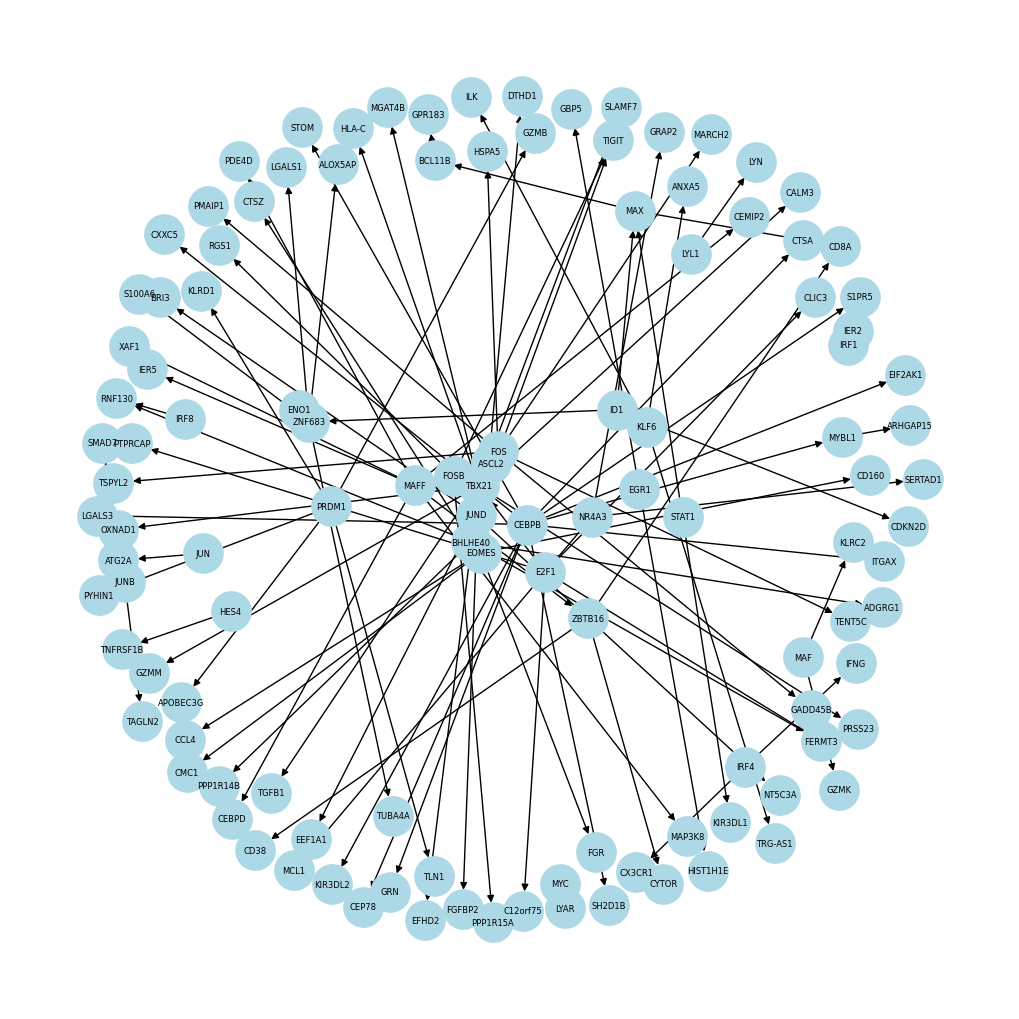

In [ ]:
plot_net(sinoneg_net)

In [ ]:
trfactors_sinoneg = gettop_tf(sinoneg_links, n=50)

In [ ]:
sinoplus_links = load_pkl(sinoplus_path)

In [ ]:
sinoplus_net = gettop_net(sinoplus_links)

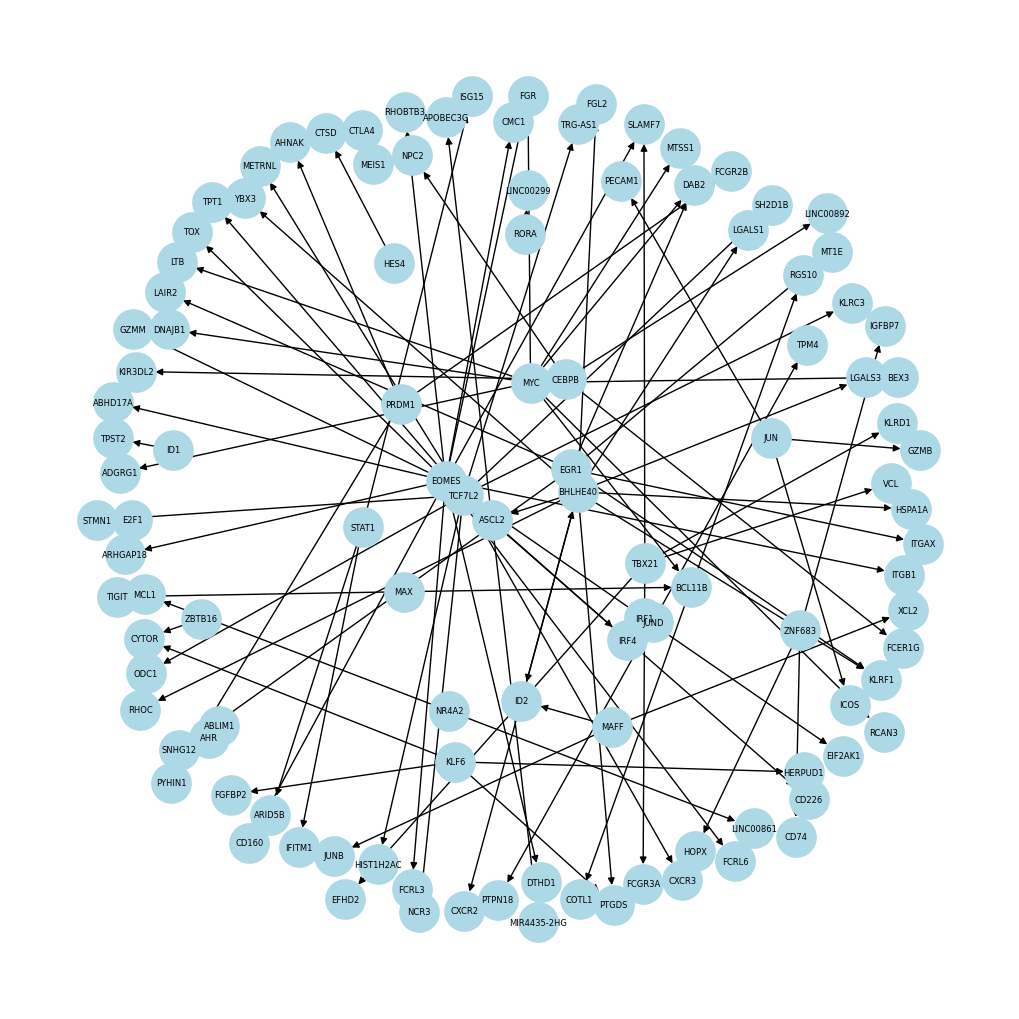

In [ ]:
plot_net(sinoplus_net)

In [ ]:
trfactors_sinoplus = gettop_tf(sinoplus_links, n = 50)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]

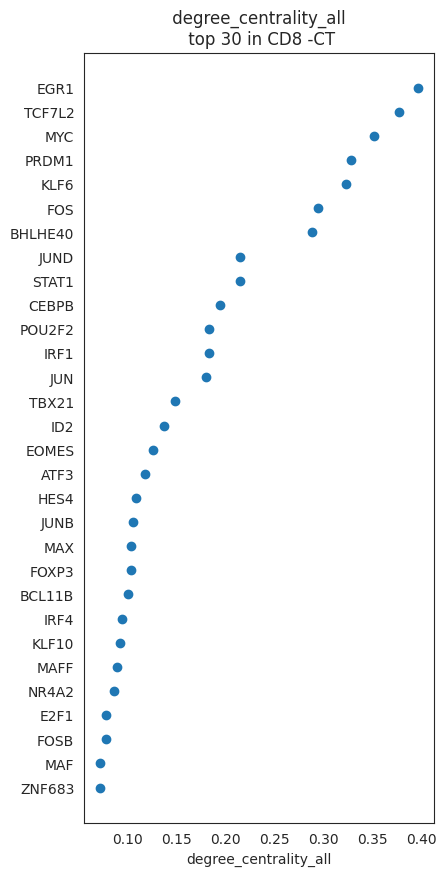

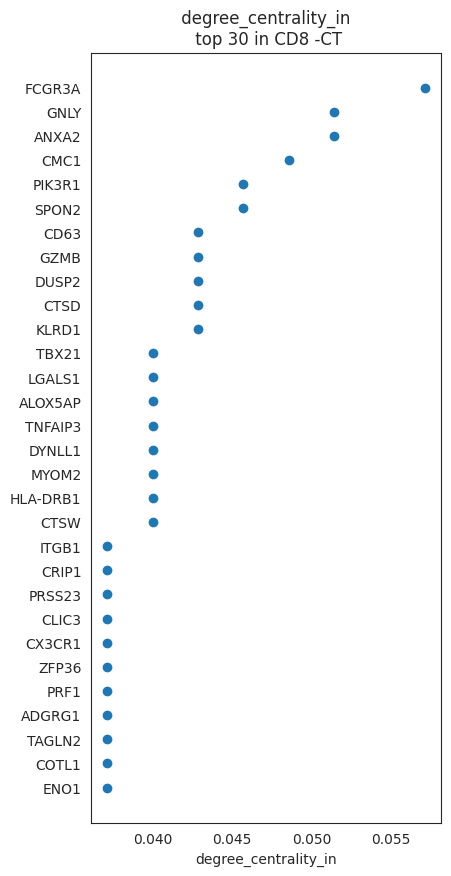

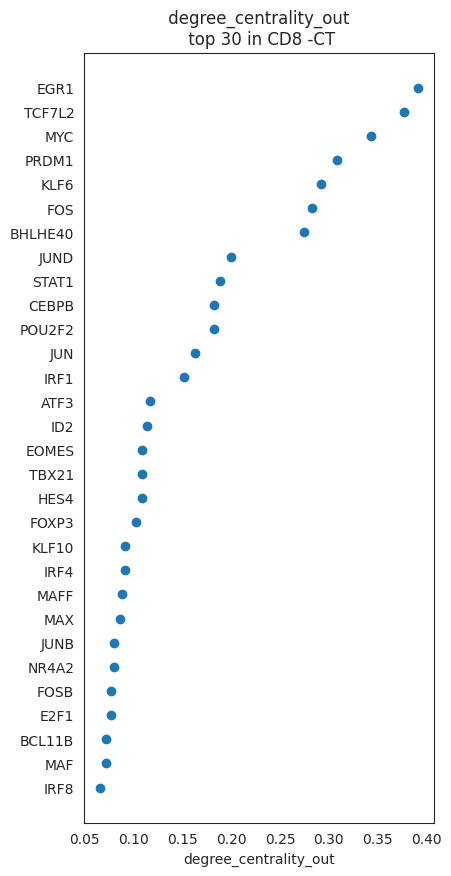

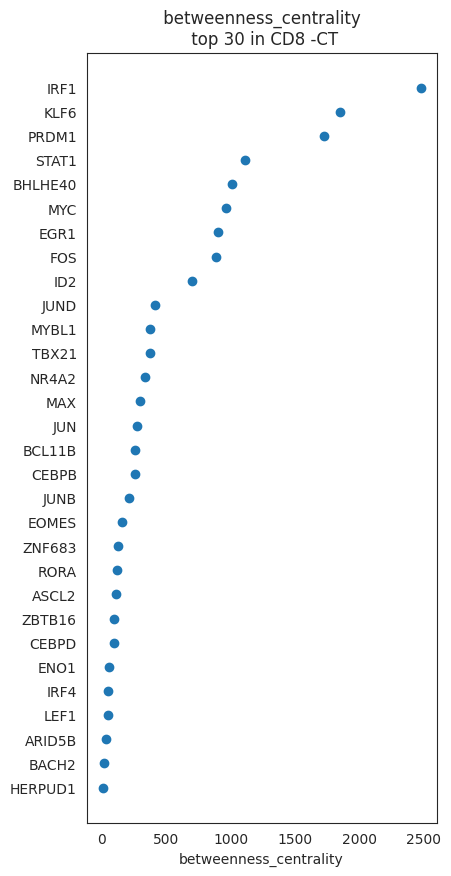

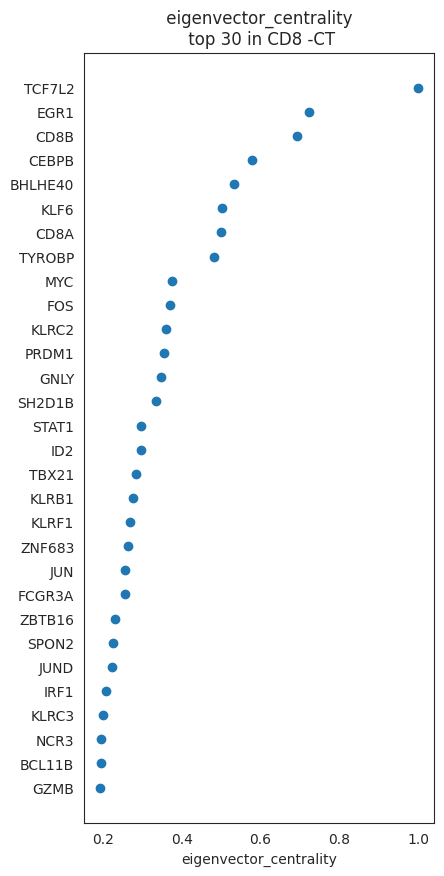

In [ ]:
sinoplus_links.plot_scores_as_rank(cluster='CD8 -CT', n_gene=30)

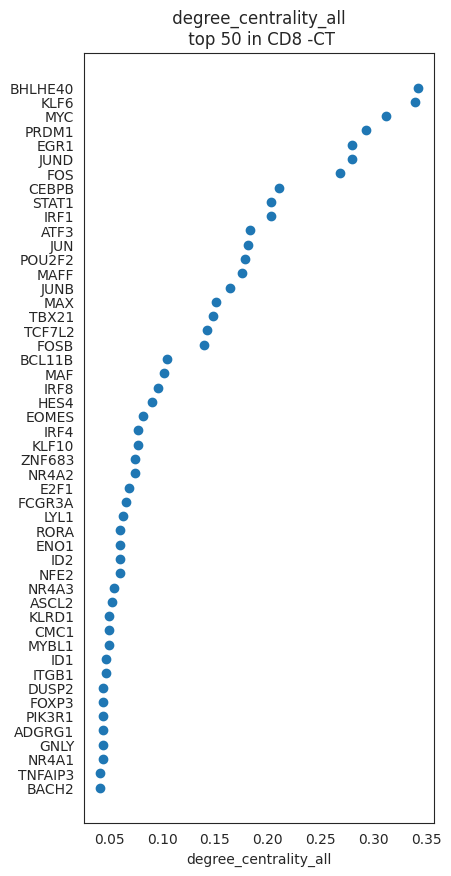

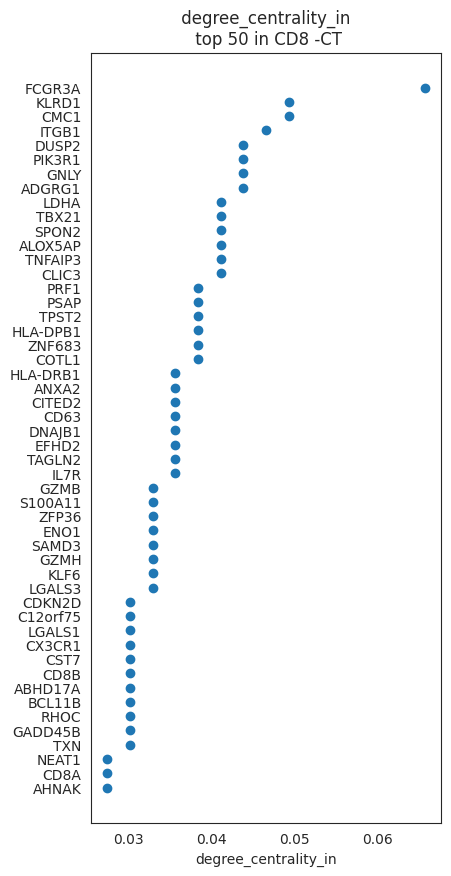

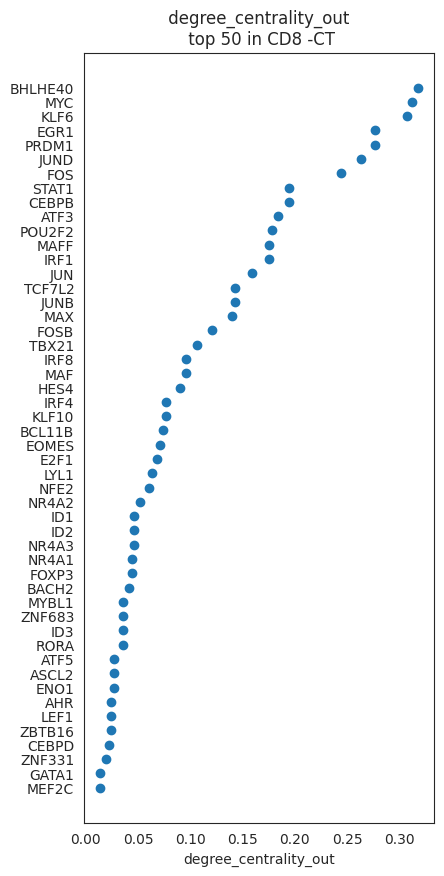

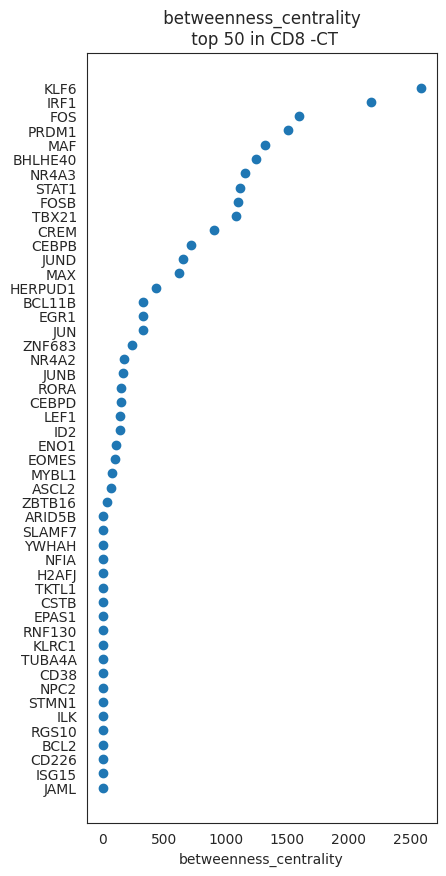

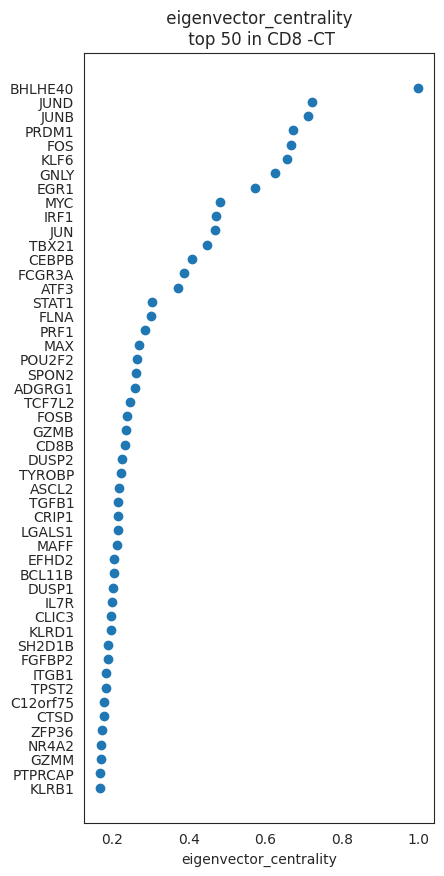

In [ ]:
sinoneg_links.plot_scores_as_rank(cluster='CD8 -CT', n_gene=50)

In [ ]:
trfactors_sinoplus

array(['EGR1', 'TCF7L2', 'MYC', 'PRDM1', 'KLF6', 'FOS', 'BHLHE40', 'JUND',
       'STAT1', 'CEBPB', 'POU2F2', 'JUN', 'IRF1', 'ATF3', 'ID2', 'EOMES',
       'TBX21', 'HES4', 'FOXP3', 'KLF10', 'IRF4', 'MAFF', 'MAX', 'JUNB',
       'NR4A2', 'FOSB', 'E2F1', 'BCL11B', 'MAF', 'IRF8', 'HES1', 'MYBL1',
       'BACH2', 'POU3F1', 'THRB', 'ZNF683', 'RORA', 'AHR', 'ATF5',
       'ASCL2', 'NR4A3', 'ID3', 'NFIA', 'ZBTB16', 'MEIS1', 'SNAI1', 'ID1',
       'CEBPD', 'GRHL1', 'EPAS1'], dtype=object)

In [ ]:
trfactors_sinoneg

array(['BHLHE40', 'MYC', 'KLF6', 'EGR1', 'PRDM1', 'JUND', 'FOS', 'STAT1',
       'CEBPB', 'ATF3', 'POU2F2', 'MAFF', 'IRF1', 'JUN', 'TCF7L2', 'JUNB',
       'MAX', 'FOSB', 'TBX21', 'IRF8', 'MAF', 'HES4', 'IRF4', 'KLF10',
       'BCL11B', 'EOMES', 'E2F1', 'LYL1', 'NFE2', 'NR4A2', 'ID1', 'ID2',
       'NR4A3', 'NR4A1', 'FOXP3', 'BACH2', 'MYBL1', 'ZNF683', 'ID3',
       'RORA', 'ATF5', 'ASCL2', 'ENO1', 'AHR', 'LEF1', 'ZBTB16', 'CEBPD',
       'ZNF331', 'GATA1', 'MEF2C'], dtype=object)

In [ ]:
set(trfactors_sinoneg) - set(trfactors_sinoplus)

{'ENO1', 'GATA1', 'LEF1', 'LYL1', 'MEF2C', 'NFE2', 'NR4A1', 'ZNF331'}

Порядок  50 наиболее представленных генов, имеющих больше всех выходящих связей в SINO- и SINO+/SINO++ отличается.

1. Гены, участвующие в развитии плазматических B-клеток представлены чаще в SINO+/SINO++. ('PRDM1', 'XBP1')

2. Гены цитокинов представлены меньше в SINO+/SINO++. ('IL-6', 'TNF') Вакцинация сопровождается меньшим цитокиновым штормом.


3. Гены обеспечивающие аггрегацию магакариоцитов чаще представлены в SINO-. При заболевании SARS-Cov2 cуществует риск тромбоза. ('NFE2', '2RX1', 'P2RY1')